In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../Dataset'))
sys.path.append(os.path.abspath('..'))

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from func_preprocesamiento import acotar_caracteristicas

In [3]:
def precio_por_m2(df):
    df['precio_por_m2'] = df['precio_pesos_constantes'] / df['SConstrM2']
    return df

In [4]:
df = pd.read_csv('../Dataset/raw/alquiler_AMBA_dev.csv')
df = acotar_caracteristicas(df)
#df_m2 = precio_por_m2(df)

/tmp/ipykernel_10948/616181032.py:1: DtypeWarning: Columns (8,33,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Dataset/raw/alquiler_AMBA_dev.csv')


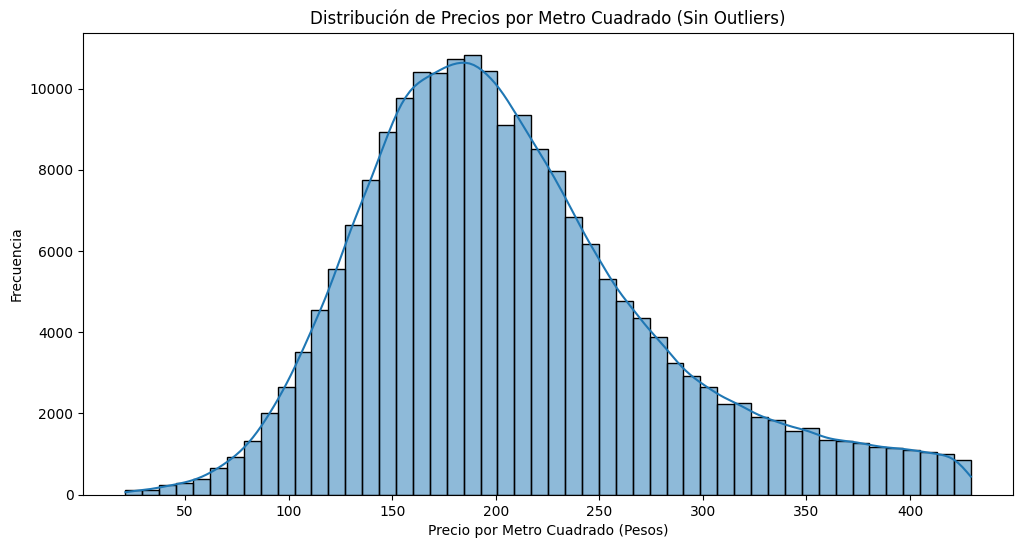

Cantidad de valores originales: 245388
Cantidad de valores después de eliminar outliers: 205022


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

alquileres_df = precio_por_m2(df)

Q1 = alquileres_df['precio_por_m2'].quantile(0.30)
Q3 = alquileres_df['precio_por_m2'].quantile(0.70)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores dentro de los límites
filtered_df = alquileres_df[(alquileres_df['precio_por_m2'] >= lower_bound) & (alquileres_df['precio_por_m2'] <= upper_bound)]
filtered_df.to_csv('../Dataset/raw/dev_lim.csv')
# Histograma de los nuevos valores
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['precio_por_m2'], bins=50, kde=True)
plt.title('Distribución de Precios por Metro Cuadrado (Sin Outliers)')
plt.xlabel('Precio por Metro Cuadrado (Pesos)')
plt.ylabel('Frecuencia')
plt.show()

print(f"Cantidad de valores originales: {alquileres_df.shape[0]}")
print(f"Cantidad de valores después de eliminar outliers: {filtered_df.shape[0]}")


In [ ]:
X = df.drop(columns=['precio_pesos_constantes']) 
y = df['precio_pesos_constantes']  

y_bins = pd.qcut(y, q=5, labels=False)              
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y_bins
)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
print('a\n')
train_data.to_csv('../Dataset/raw/dev_lim.csv', index=False)
test_data.to_csv('../Dataset/raw/test_lim.csv', index=False)

/tmp/ipykernel_51242/2658601518.py:1: DtypeWarning: Columns (8,33,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Dataset/raw/alquiler_AMBA_dev.csv')


a

